# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [2]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm_stop.pkl')
data = data.transpose()
data.head()

,anthony,asir,berner,cole,devito,ellen,fortune,hasan,jamie,jeff,jim,kerman,nate,paul,rogan,ronny,seth,tim,tom
aback,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
ability,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
able,1,6,1,0,0,2,1,1,1,0,3,0,0,1,0,1,0,2,1
able make,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
abortion,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Find the top 30 words said by each comedian (with native int counts)
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    # Convert counts to native Python ints
    top_dict[c] = [(word, int(count)) for word, count in zip(top.index, top.values)]

top_dict


{'anthony': [('joke', 24),
  ('mike', 14),
  ('trans', 14),
  ('jokes', 11),
  ('mike tyson', 11),
  ('tyson', 11),
  ('fuck', 10),
  ('shit', 10),
  ('couple', 10),
  ('months', 9),
  ('fucking', 8),
  ('milwaukee', 8),
  ('pregnant', 7),
  ('culture', 6),
  ('cancel', 6),
  ('finally', 6),
  ('standup comedy', 6),
  ('gotten', 6),
  ('hate', 6),
  ('sex', 6),
  ('dog', 6),
  ('parents', 6),
  ('porn', 6),
  ('standup', 6),
  ('comedy', 6),
  ('comedians', 5),
  ('months ago', 5),
  ('trans people', 5),
  ('tonight', 5),
  ('favorite', 5)],
 'asir': [('country', 26),
  ('school', 23),
  ('sort', 20),
  ('children', 17),
  ('fucking', 17),
  ('london', 14),
  ('basically', 14),
  ('place', 14),
  ('bit', 13),
  ('probably', 13),
  ('british', 13),
  ('entirely', 13),
  ('mr', 12),
  ('obviously', 12),
  ('prime', 12),
  ('imagine', 12),
  ('course', 11),
  ('indian', 11),
  ('boy', 11),
  ('married', 11),
  ('martin', 11),
  ('youd', 10),
  ('loved', 10),
  ('quite', 10),
  ('india', 9

In [10]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

anthony
joke, mike, trans, jokes, mike tyson, tyson, fuck, shit, couple, months, fucking, milwaukee, pregnant, culture
---
asir
country, school, sort, children, fucking, london, basically, place, bit, probably, british, entirely, mr, obviously
---
berner
men, fucking, girls, sex, fuck, dick, gun, wanna, girl, fault, hot, wedding, kevin, guns
---
cole
shit, ngga, motherfucker, aint, fuck, black, dick, em, fucking, yall, men, rub, nggas, everybody
---
devito
mouth, dating, dentist, single, age, teeth, car, father, youve got, mother, hand, guard, sides, younger
---
ellen
ellen, business, um, car, pigeon, golden, gay, thinking, thank thank, people think, degeneres, started, truth, boss
---
fortune
mom, car, biscuits, wanna, cemetery, oh god, driving, looking, gay, ghosts, playing, train, hours, bells
---
hasan
fucking, fuck, shit, boundaries, door, mom, white, dog, parents, wanna, america, remember, therapy, indian
---
jamie
shit, ngga, fuck, black, white, stay, clone, aint, thank thank, g

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [11]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words

['joke',
 'mike',
 'trans',
 'jokes',
 'mike tyson',
 'tyson',
 'fuck',
 'shit',
 'couple',
 'months',
 'fucking',
 'milwaukee',
 'pregnant',
 'culture',
 'cancel',
 'finally',
 'standup comedy',
 'gotten',
 'hate',
 'sex',
 'dog',
 'parents',
 'porn',
 'standup',
 'comedy',
 'comedians',
 'months ago',
 'trans people',
 'tonight',
 'favorite',
 'country',
 'school',
 'sort',
 'children',
 'fucking',
 'london',
 'basically',
 'place',
 'bit',
 'probably',
 'british',
 'entirely',
 'mr',
 'obviously',
 'prime',
 'imagine',
 'course',
 'indian',
 'boy',
 'married',
 'martin',
 'youd',
 'loved',
 'quite',
 'india',
 'isnt',
 'shit',
 'comedian',
 'asian',
 'needed',
 'men',
 'fucking',
 'girls',
 'sex',
 'fuck',
 'dick',
 'gun',
 'wanna',
 'girl',
 'fault',
 'hot',
 'wedding',
 'kevin',
 'guns',
 'prince',
 'water',
 'takes',
 'hold',
 'drink',
 'single',
 'um',
 'scared',
 'tiktok',
 'babe',
 'shit',
 'movies',
 'youre gonna',
 'birth',
 'older man',
 'older',
 'shit',
 'ngga',
 'motherf

In [12]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()
# this contains all the words from all the comedians altogether.

[('shit', 11),
 ('fuck', 9),
 ('fucking', 9),
 ('parents', 7),
 ('men', 7),
 ('white', 6),
 ('remember', 6),
 ('mom', 6),
 ('dog', 5),
 ('school', 5),
 ('probably', 5),
 ('wanna', 5),
 ('everybody', 5),
 ('car', 5),
 ('looking', 5),
 ('sex', 4),
 ('um', 4),
 ('age', 4),
 ('father', 4),
 ('thank thank', 4),
 ('funny', 4),
 ('tonight', 3),
 ('favorite', 3),
 ('country', 3),
 ('children', 3),
 ('married', 3),
 ('girls', 3),
 ('dick', 3),
 ('aint', 3),
 ('black', 3),
 ('em', 3),
 ('yall', 3),
 ('youll', 3),
 ('gay', 3),
 ('thinking', 3),
 ('honest', 3),
 ('special', 3),
 ('america', 3),
 ('die', 3),
 ('jokes', 2),
 ('milwaukee', 2),
 ('pregnant', 2),
 ('hate', 2),
 ('porn', 2),
 ('bit', 2),
 ('imagine', 2),
 ('indian', 2),
 ('comedian', 2),
 ('girl', 2),
 ('hot', 2),
 ('water', 2),
 ('takes', 2),
 ('hold', 2),
 ('single', 2),
 ('youre gonna', 2),
 ('older', 2),
 ('ngga', 2),
 ('motherfucker', 2),
 ('imma', 2),
 ('goddamn', 2),
 ('ellen', 2),
 ('tiny', 2),
 ('hours', 2),
 ('door', 2),
 ('du

In [18]:
from collections import Counter
import pandas as pd
import plotly.express as px

words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    words.extend(top)

# Count the frequency of each word
word_counts = Counter(words)

#  Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
common_words_df = common_words_df.sort_values(by='count', ascending=False).head(30)

fig = px.bar(
    common_words_df,
    x='word',
    y='count',
    title='Most Common Words Across Comedians’ Top 30 Lists',
    labels={'word': 'Word', 'count': 'Number of Comedians'},
    text='count'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()


In [32]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 10]

add_stop_words
# having a word count more than 10 means that the word is very common in majority of the comedians and hence wont help in distingishing the patterns.

['shit']

In [33]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

stop_words = list(text.ENGLISH_STOP_WORDS) + add_stop_words

# Recreate document-term matrix
cv = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.85, stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index


In [34]:
# Let's make some word clouds!
from wordcloud import WordCloud

# WordCloud configurations
wc = WordCloud(stopwords=stop_words, # Custom stop words to exclude
               background_color="black",
               colormap="Dark2", # Color scheme --> Dark2
               max_font_size=150,
               random_state=42)


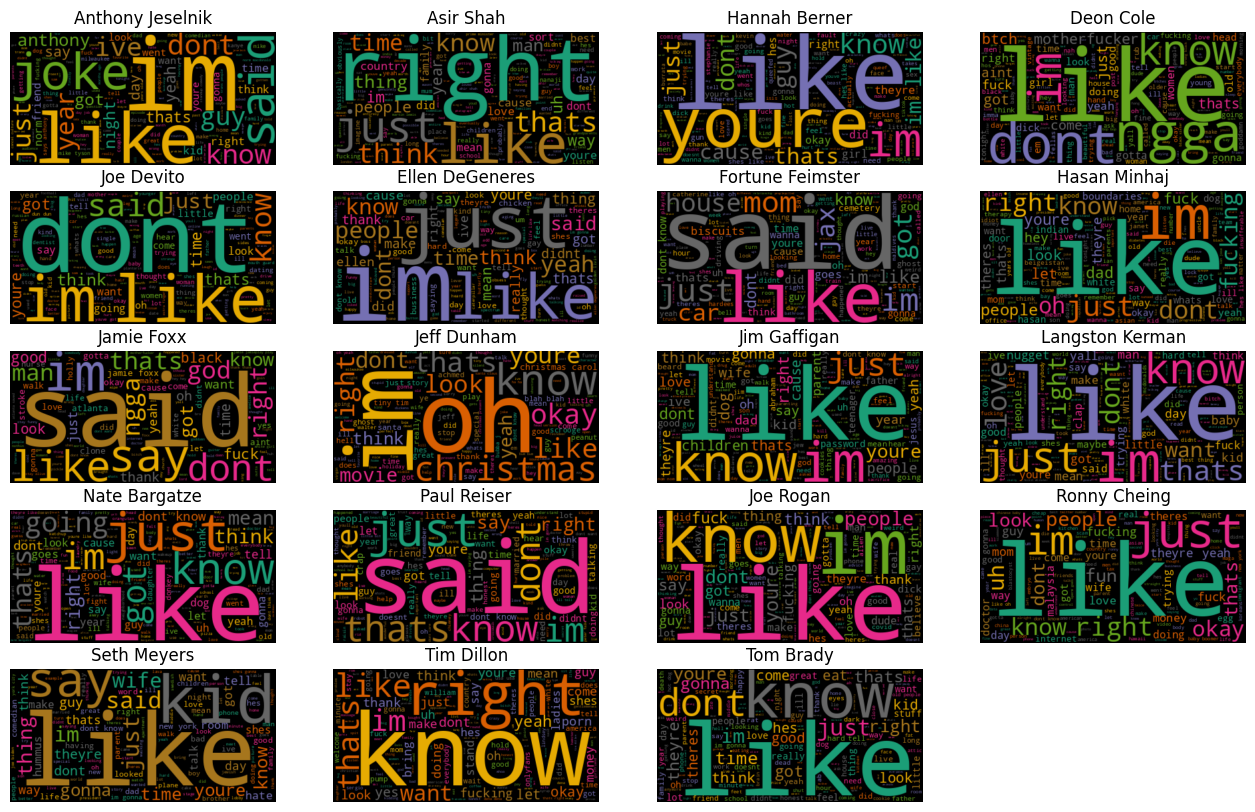

In [35]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 10]

full_names = ['Anthony Jeselnik', 'Asir Shah', 'Hannah Berner', 'Deon Cole', 'Joe Devito', 'Ellen DeGeneres',
              'Fortune Feimster', 'Hasan Minhaj', 'Jamie Foxx', 'Jeff Dunham', 'Jim Gaffigan', 'Langston Kerman','Nate Bargatze', 'Paul Reiser', 'Joe Rogan', 'Ronny Cheing', 'Seth Meyers', 'Tim Dillon', 'Tom Brady']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

In [36]:
# Notice that words: 'said' and 'like' and others are very common in each comedians' wordcloud

from sklearn.feature_extraction.text import CountVectorizer

stop_words = list(text.ENGLISH_STOP_WORDS) + add_stop_words + ['like', 'just', 'know', 'im', 'dont', 'right', 'thats','said']

# Recreate document-term matrix
cv = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.8, stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index



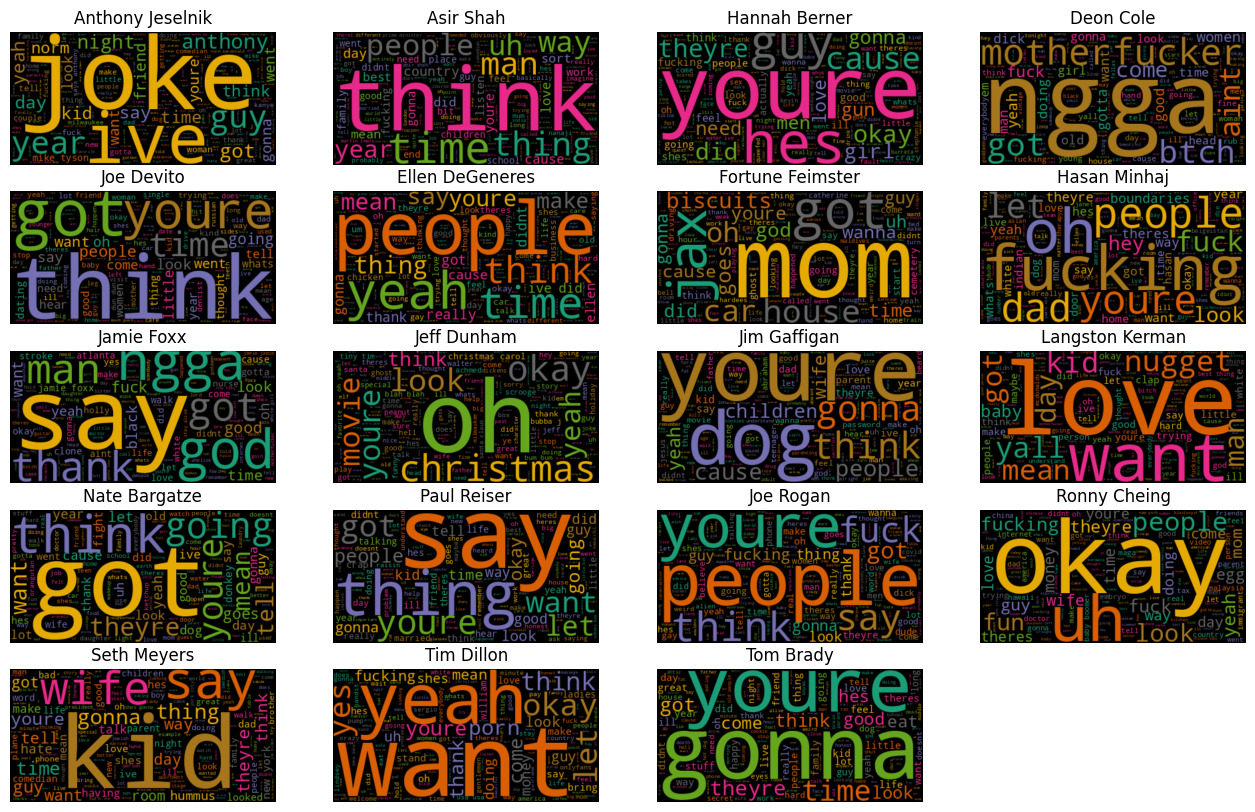

In [37]:
wc = WordCloud(stopwords=stop_words, # Custom stop words
               background_color="black",
               colormap="Dark2",
               max_font_size=150,
               random_state=42)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 10]

full_names = ['Anthony Jeselnik', 'Asir Shah', 'Hannah Berner', 'Deon Cole', 'Joe Devito', 'Ellen DeGeneres',
              'Fortune Feimster', 'Hasan Minhaj', 'Jamie Foxx', 'Jeff Dunham', 'Jim Gaffigan', 'Langston Kerman','Nate Bargatze', 'Paul Reiser', 'Joe Rogan', 'Ronny Cheing', 'Seth Meyers', 'Tim Dillon', 'Tom Brady']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

In [ ]:
# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

### Findings

Anthony Jeselnik: Large word "joke" implies meta-comedy or self-reference to stand-up material.

Asir Shah: Dominated by “think”, “man”, “time” — reflective or philosophical humor.

Hannah Berner: Heavy on “you’re”, “he’s”, “guy” — relationship-based themes.

Deon Cole: Frequent use of profanity (“nigga”, “motherfucker”, “bitch”) — raw and bold comedic style.

Joe Devito: “guy”, “you’re”, “time” — everyday situations and observations.

Ellen DeGeneres: “people”, “yeah”, “thing” — general social commentary.

Fortune Feimster: “mom”, “house”, “biscuits” — family and personal life stories.

Hasan Minhaj: “fuckin”, “people”, “dad” — intense, socio-political storytelling.

Jamie Foxx: “say”, “god”, “man” — expressive and charismatic tone.

Jeff Dunham: “oh”, “Christmas”, “movie” — performance and seasonal themes.

Jim Gaffigan: “you’re”, “dog”, “children” — family and clean comedy.

Langston Kerman: “love”, “want”, “kid” — emotional, relatable humor.

Nate Bargatze: “got”, “thing”, “mean” — dry and observational comedy.

Paul Reiser: “say”, “thing”, “want” — reflective, situational humor.

Joe Rogan: “people”, “fuck”, “you’re” — intense, direct commentary.

Ronny Cheing: “okay”, “uh”, “fun” — casual and sarcastic style.

Seth Meyers: “wife”, “kid”, “say” — family and married life.

Tim Dillon: “yeah”, “want”, “poor” — aggressive, political, and financial satire.

Tom Brady: “you’re”, “gonna”, “thing” — forward-looking, active voice.

## Number of Words

### Analysis

In [41]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort = data_unique_sort.sort_values(by='unique_words', ascending=False)
data_unique_sort

,comedian,unique_words
14,Joe Rogan,1485
13,Paul Reiser,1377
1,Asir Shah,1370
18,Tom Brady,1354
16,Seth Meyers,1334
15,Ronny Cheing,1275
10,Jim Gaffigan,1258
5,Ellen DeGeneres,1242
7,Hasan Minhaj,1149
11,Langston Kerman,1095


In [49]:
import plotly.express as px

fig = px.bar(
    data_unique_sort,
    x='comedian',
    y='unique_words',
    title='Number of Unique Words Used by Each Comedian',
    labels={'unique_words': 'Unique Word Count'},
    text='unique_words',
    color_discrete_sequence=['red']
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()


A higher unique word count may reflect:
      1.Broader topics covered

  2.More descriptive or intellectual humor

3.Less repetition of phrases

In [50]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB, in minutes
run_times = [63, 68, 58, 59, 61, 47, 65, 63, 60, 62, 51, 70, 65, 61, 50, 79, 67, 50, 50]

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']
data_words['unique_words_per_minute'] = data_words['unique_words'] / data_words['run_times']

data_wpm_sort = data_words.sort_values(by='unique_words_per_minute')
data_wpm_sort



,comedian,unique_words,total_words,run_times,words_per_minute,unique_words_per_minute
4,Joe Devito,861,1186,61,19.442623,14.114754
0,Anthony Jeselnik,939,1531,63,24.301587,14.904762
6,Fortune Feimster,994,1734,65,26.676923,15.292308
12,Nate Bargatze,994,1655,65,25.461538,15.292308
8,Jamie Foxx,920,2111,60,35.183333,15.333333
9,Jeff Dunham,952,1767,62,28.500000,15.354839
3,Deon Cole,910,1901,59,32.220339,15.423729
11,Langston Kerman,1095,1844,70,26.342857,15.642857
15,Ronny Cheing,1275,2320,79,29.367089,16.139241
2,Hannah Berner,989,1577,58,27.189655,17.051724


In [52]:
#bar chart
melted = data_words.melt(id_vars='comedian', value_vars=['words_per_minute', 'unique_words_per_minute'],
                         var_name='metric', value_name='wpm')       #melt function reshapes the DataFrame to make it suitable for grouped bar plots

fig = px.bar(
    melted,
    x='comedian',
    y='wpm',
    color='metric',
    barmode='group',
    title='Words Per Minute vs. Unique Words Per Minute by Comedian',
    labels={'wpm': 'Words per Minute'}
)

fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()


Joe Rogan speaks the fastest (53 WPM) and uses the most unique words (30 U-WPM).

Tom Brady also shows a high rate of speaking and vocabulary richness.

Asir Shah and Langston Kerman use many unique words relative to their speaking speed.

Joe Devito and Ellen DeGeneres have lower speaking speeds and lower vocabulary diversity.

Large blue-red gap (e.g., Paul Reiser) implies more repetition or filler words.

Small blue-red gap (e.g., Langston Kerman) indicates denser, more varied speech

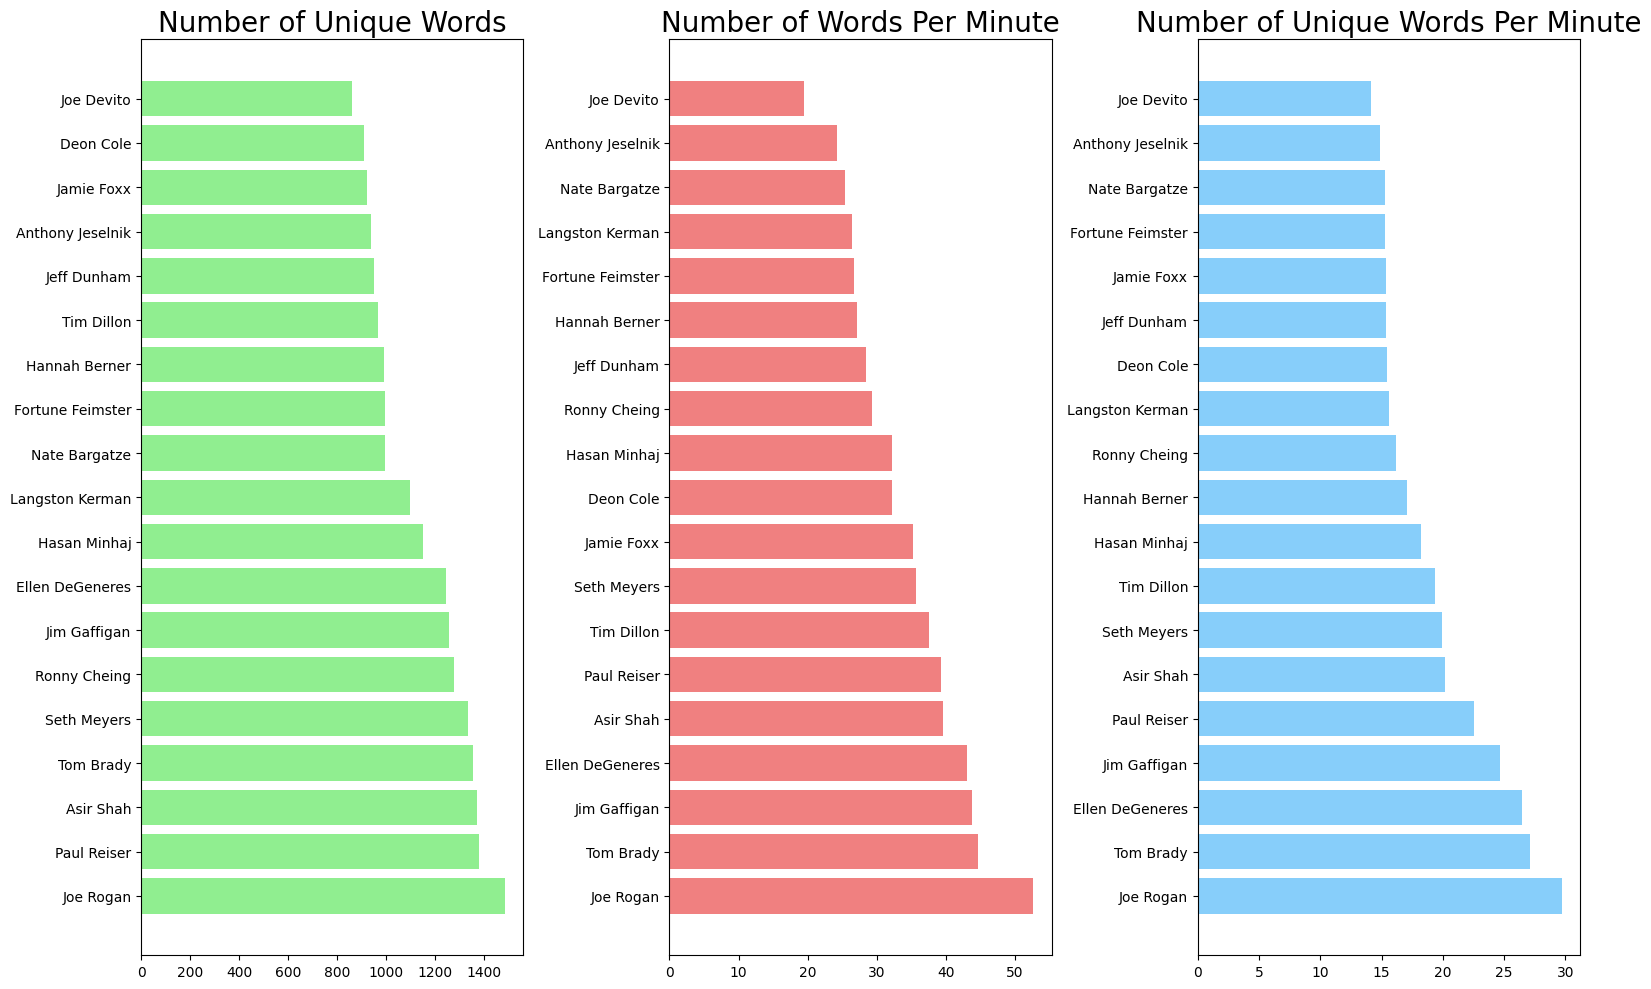

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Sort data in descending order
data_unique_sort_desc = data_unique_sort.sort_values(by='unique_words', ascending=False)
data_wpm_sort_desc = data_wpm_sort.sort_values(by='words_per_minute', ascending=False)
data_wpm_sort_unique_desc = data_wpm_sort.sort_values(by='unique_words_per_minute', ascending=False)

# Create the plots with sorted data
y_pos = np.arange(len(data_words))

plt.subplot(1, 3, 1)
plt.barh(y_pos, data_unique_sort_desc.unique_words, align='center', color='lightgreen')
plt.yticks(y_pos, data_unique_sort_desc.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 3, 2)
plt.barh(y_pos, data_wpm_sort_desc.words_per_minute, align='center', color='lightcoral')
plt.yticks(y_pos, data_wpm_sort_desc.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.subplot(1, 3, 3)
plt.barh(y_pos, data_wpm_sort_unique_desc.unique_words_per_minute, align='center', color='lightskyblue')
plt.yticks(y_pos, data_wpm_sort_unique_desc.comedian)
plt.title('Number of Unique Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()


### Findings

* **Vocabulary**
   * Joe Rogan, Paul Reiser and Tom Brady use a lot of words in their comedy
   * Joe Devito has a smaller vocabulary


* **Talking Speed**
   * Joe Rogan talks faster compared to the rest of the comedians. However the rate at which he uses the unique words is same as Tom Brady
   * Joe Devito and Anthony Jeselnik  talk slow

* **Findings**
  * Joe Devito speaks 20 words per min out of which 15 are unique. Due to slow speed he is understood well by the audience even if most of the times he uses a unique word.
  * On the other hand, Joe Rogan uses 60+ words per min and 35 of them are unique. This might make his comedy hard to be interpreted.
   
Rest of the comedians have a similar handle on the vocabulary and on their speed of speech.

## Amount of Profanity

### Analysis

In [55]:
#  Visiting profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('shit', 11),
 ('fuck', 9),
 ('fucking', 9),
 ('parents', 7),
 ('men', 7),
 ('white', 6),
 ('remember', 6),
 ('mom', 6),
 ('dog', 5),
 ('school', 5),
 ('probably', 5),
 ('wanna', 5),
 ('everybody', 5),
 ('car', 5),
 ('looking', 5),
 ('sex', 4),
 ('um', 4),
 ('age', 4),
 ('father', 4),
 ('thank thank', 4),
 ('funny', 4),
 ('tonight', 3),
 ('favorite', 3),
 ('country', 3),
 ('children', 3),
 ('married', 3),
 ('girls', 3),
 ('dick', 3),
 ('aint', 3),
 ('black', 3),
 ('em', 3),
 ('yall', 3),
 ('youll', 3),
 ('gay', 3),
 ('thinking', 3),
 ('honest', 3),
 ('special', 3),
 ('america', 3),
 ('die', 3),
 ('jokes', 2),
 ('milwaukee', 2),
 ('pregnant', 2),
 ('hate', 2),
 ('porn', 2),
 ('bit', 2),
 ('imagine', 2),
 ('indian', 2),
 ('comedian', 2),
 ('girl', 2),
 ('hot', 2),
 ('water', 2),
 ('takes', 2),
 ('hold', 2),
 ('single', 2),
 ('youre gonna', 2),
 ('older', 2),
 ('ngga', 2),
 ('motherfucker', 2),
 ('imma', 2),
 ('goddamn', 2),
 ('ellen', 2),
 ('tiny', 2),
 ('hours', 2),
 ('door', 2),
 ('du

In [56]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit', 'nggas', 'motherfucker','titties','dick', 'porn', 'sex', 'bitch']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck,
                            data_bad_words.shit,
                            data_bad_words.nggas,
                            data_bad_words.motherfucker + data_bad_words.bitch,
                            data_bad_words.titties + data_bad_words.dick + data_bad_words.sex + data_bad_words.porn], axis=1)
data_profanity.columns = ['f_word', 's_word', 'n_word', 'offensive_words', 'strong_words']
data_profanity

,f_word,s_word,n_word,offensive_words,strong_words
anthony,18,10,0,1,12
asir,22,9,0,0,0
berner,28,6,0,3,24
cole,47,92,13,38,29
devito,0,0,0,0,0
ellen,1,0,0,0,1
fortune,7,2,0,2,0
hasan,68,27,0,7,3
jamie,36,44,8,19,4
jeff,0,0,0,3,0


In [57]:
# Calculate total bad words for each comedian
data_profanity['total_bad_words'] = data_profanity.sum(axis=1)

data_profanity['run_time'] = run_times  # Run time in minutes

# Calculate bad words per minute (BWPM)
data_profanity['bw_per_minute'] = data_profanity['total_bad_words'] / data_profanity['run_time']


In [59]:
# Sort by BWPM to see the most and least explicit comedians
data_bwpm_sort = data_profanity.sort_values(by='bw_per_minute', ascending=False)

# Display results
data_bwpm_sort[['total_bad_words', 'run_time', 'bw_per_minute']]

,total_bad_words,run_time,bw_per_minute
cole,219,59,3.711864
rogan,134,50,2.680000
tim,95,50,1.900000
jamie,111,60,1.850000
hasan,105,63,1.666667
berner,61,58,1.051724
kerman,73,70,1.042857
ronny,71,79,0.898734
anthony,41,63,0.650794
seth,31,67,0.462687


In [75]:
import plotly.express as px

# Ensure comedian names are included
data_profanity['comedian'] = data_profanity.index

# Plot total bad words per comedian
fig = px.bar(
    data_profanity,
    x='comedian',
    y='total_bad_words',
    title='Total Bad Words Used by Each Comedian',
    labels={'total_bad_words': 'Total Bad Words', 'comedian': 'Comedian'},
    color='total_bad_words',
    color_continuous_scale='curl',
    height=600
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Comedian',
    yaxis_title='Total Bad Words',
)

fig.show()


# Overall Findings of bad words
- Comedians with Highest Profanity: The comedian with the highest profanity usage is "Cole" with over 200 total "bad words" in their routine.
- Comedians with Moderate Profanity: Several comedians, such as "Fortune", "Seth", and "Berner", fall in the middle range of profanity usage, with totals between 50 and 100 "bad words".
- Comedians with Lower Profanity: Some comedians, like "Ellen", "Nate", and "Paul", use relatively fewer "bad words" in their routines, with totals under 50.

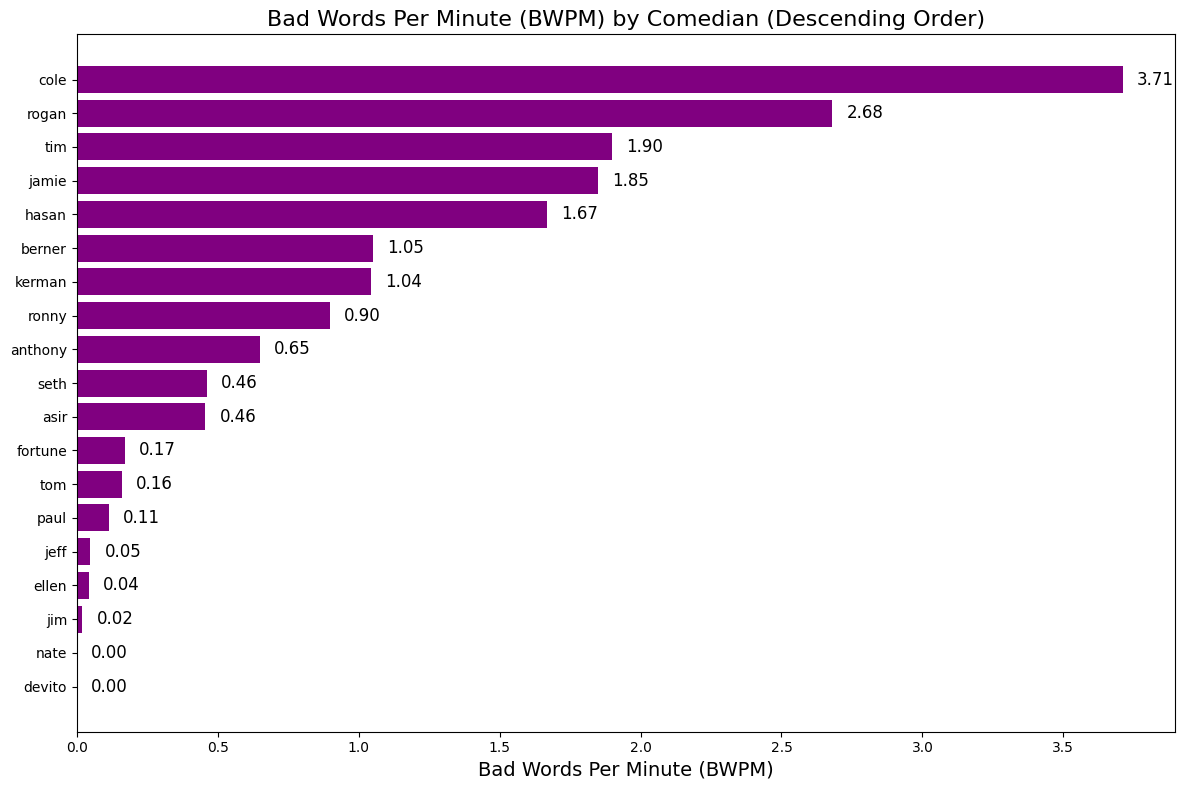

In [62]:
import matplotlib.pyplot as plt

# Sort the data by
data_bwpm_sort_desc = data_profanity.sort_values(by='bw_per_minute', ascending=True)

# Bar chart of BWPM
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(data_bwpm_sort_desc))

plt.barh(y_pos, data_bwpm_sort_desc.bw_per_minute, align='center', color='purple')
plt.yticks(y_pos, data_bwpm_sort_desc.index)
plt.xlabel('Bad Words Per Minute (BWPM)', fontsize=14)
plt.title('Bad Words Per Minute (BWPM) by Comedian (Descending Order)', fontsize=16)


for i, v in enumerate(data_bwpm_sort_desc.bw_per_minute):
    plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()


In [64]:
import plotly.express as px

data_profanity['comedian'] = data_profanity.index

fig = px.scatter(
    data_profanity,
    x='f_word',  # Number of F-words
    y='s_word',  # Number of S-words
    size=(data_profanity['offensive_words'] + data_profanity['strong_words'] + data_profanity['n_word']) * 10,  # Bubble size
    color='bw_per_minute',  # Color intensity based on BWPM
    hover_name='comedian',  # Show comedian name on hover
    color_continuous_scale='Turbo',  # Updated color scale
    title='Profanity Usage in Comedian Routines',  # Plot title
    labels={'f_word': 'Number of F-words', 's_word': 'Number of S-words'}
)

fig.update_layout(
    xaxis_title='Number of F-words',
    yaxis_title='Number of S-words'
)

# Show the plot
fig.show()

**family related words**

In [65]:
# Family-related words
data_family_words = data.transpose()[['parents', 'mom', 'father', 'children', 'son', 'daughter', 'sister', 'mother', 'brother']]
data_family = pd.concat([data_family_words.parents + data_family_words.mom + data_family_words.father,
                         data_family_words.children + data_family_words.son + data_family_words.daughter,
                         data_family_words.sister + data_family_words.mother + data_family_words.brother], axis=1)
data_family.columns = ['parent_references', 'child_references', 'sibling_references']
data_family

,parent_references,child_references,sibling_references
anthony,11,4,6
asir,9,23,9
berner,2,4,1
cole,0,0,7
devito,10,2,6
ellen,4,0,2
fortune,41,1,3
hasan,26,10,2
jamie,0,9,15
jeff,13,5,3


In [66]:
import plotly.express as px

# Create a bar plot for family references
fig = px.bar(
    data_family,
    x=data_family.index,  # Comedians
    y=['parent_references', 'child_references', 'sibling_references'],  # Family categories
    barmode='group',  # Group the bars
    title='Family-Related Word Usage in Comedian Routines',
    labels={'parent_references': 'Parent References', 'child_references': 'Child References', 'sibling_references': 'Sibling References'},
    height=600
)

fig.update_layout(xaxis_title='Comedians', yaxis_title='Family Word Count')
fig.show()


# Findings
- Fortune, Ronny and jim uses the parent_references very often than the other. This might lead to 2 conclusions:  
  * either the comedian tries to connect with the audience on a more emotional level
  * or the comedian tries to combine the family words with provocative humour.

**Sentiments -----> + or - or neutral**

In [76]:
# Sentiment-related words grouping
data_sentiment_words = data.transpose()[['loved',  'beloved', 'funny', 'amazing', 'special', 'favorite', 'welcome',  # positive
                                       'hate', 'stupid', 'scared', 'dead', 'hurt', 'die', 'kill']]  # negative

# Group into positive and negative sentiment
data_sentiment = pd.concat([
    # Positive sentiment words
    data_sentiment_words.loved + data_sentiment_words.beloved +
    data_sentiment_words.funny + data_sentiment_words.amazing +
    data_sentiment_words.special + data_sentiment_words.favorite +
    data_sentiment_words.welcome,

    # Negative sentiment words
    data_sentiment_words.hate + data_sentiment_words.stupid +
    data_sentiment_words.scared + data_sentiment_words.dead +
    data_sentiment_words.hurt + data_sentiment_words.die +
    data_sentiment_words.kill
], axis=1)

data_sentiment.columns = ['positive_sentiment', 'negative_sentiment']

# Calculate sentiment ratio (positive/negative)
data_sentiment['sentiment_ratio'] = data_sentiment.positive_sentiment / data_sentiment.negative_sentiment

# Calculate total sentiment words
data_sentiment['total_sentiment_words'] = data_sentiment.positive_sentiment + data_sentiment.negative_sentiment

data_sentiment

,positive_sentiment,negative_sentiment,sentiment_ratio,total_sentiment_words
anthony,11,11,1.000000,22
asir,20,7,2.857143,27
berner,9,21,0.428571,30
cole,1,7,0.142857,8
devito,2,5,0.400000,7
ellen,24,7,3.428571,31
fortune,1,5,0.200000,6
hasan,2,19,0.105263,21
jamie,19,10,1.900000,29
jeff,41,25,1.640000,66


In [82]:
import plotly.express as px
import numpy as np

data_sentiment['comedian'] = data_sentiment.index

def classify_sentiment(row):
    if np.isclose(row['positive_sentiment'], row['negative_sentiment']):
        return 'neutral'
    elif row['positive_sentiment'] > row['negative_sentiment']:
        return 'positive'
    else:
        return 'negative'

data_sentiment['sentiment_type'] = data_sentiment.apply(classify_sentiment, axis=1)

fig = px.scatter(
    data_sentiment,
    x='positive_sentiment',
    y='negative_sentiment',
    text='comedian',
    color='sentiment_type',
    color_discrete_map={'positive': 'red', 'negative': 'black', 'neutral': 'yellow'},
    title='Sentiment Classification of Comedians',
    labels={
        'positive_sentiment': 'Positive Words',
        'negative_sentiment': 'Negative Words',
        'sentiment_type': 'Sentiment Category'
    },
    height=600
)

fig.update_layout(xaxis_title='Positive Sentiment Words', yaxis_title='Negative Sentiment Words')
fig.show()

## Side Note

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [88]:
fam_rel = data.transpose()[data.transpose().columns.intersection(['mom', 'dad', 'kids', 'parents', 'girlfriend', 'boyfriend', 'wife', 'husband'])].copy()

fam_rel['family'] = fam_rel[fam_rel.columns.intersection(['mom', 'dad', 'kids', 'parents'])].sum(axis=1)

fam_rel['relationship'] = fam_rel[fam_rel.columns.intersection(['girlfriend', 'boyfriend', 'wife', 'husband'])].sum(axis=1)

fam_rel['comedian'] = fam_rel.index

px.scatter(fam_rel, x='family', y='relationship', text='comedian',
           title='Family vs Relationship Words').update_traces(textposition='top center').show()

In [92]:
gender_words = data.transpose()[data.transpose().columns.intersection(
    ['man', 'men', 'boy', 'guy', 'woman', 'women', 'girl', 'lady']
)].copy()

gender_words['male'] = gender_words[gender_words.columns.intersection(['man', 'men', 'boy', 'guy'])].sum(axis=1)
gender_words['female'] = gender_words[gender_words.columns.intersection(['woman', 'women', 'girl', 'lady'])].sum(axis=1)
gender_words['comedian'] = gender_words.index

px.scatter(gender_words, x='male', y='female', text='comedian',
           title='Male vs Female Mentions').show()
